In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw
from tqdm import tqdm

# Função para criar um dataset fictício

[60, 143, 91, 174]


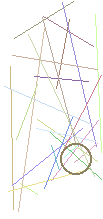

In [2]:
def cor_aleatoria(clara=True):
    if (clara):
        return random.randint(100, 255), random.randint(100, 255), random.randint(100, 255)
    else:
        return random.randint(0, 150), random.randint(0, 150), random.randint(0, 150)

def criar_imagem():

    size_min, size_max = 100, 300
    radius_min, radius_max = 30, 50
    
    w, h = random.randint(size_min, size_max), random.randint(size_min, size_max)
    
    img_pil = Image.new('RGB', (w, h), color='white')
    draw = ImageDraw.Draw(img_pil)

    for _ in range(25):
        draw.line((random.randint(0, w), random.randint(0, h), random.randint(0, w), random.randint(0, h)), width=1, fill=cor_aleatoria())
    
    radius = random.randint(radius_min, radius_max)
    xmin, ymin, xmax, ymax = radius, radius, w-radius, h-radius
    x, y = random.randint(xmin, xmax), random.randint(ymin, ymax)

    bbox = [x, y, x+radius, y+radius]
    draw.ellipse(bbox, fill=None, outline=cor_aleatoria(clara=False), width=2)

    #draw.rectangle(bbox, fill=None, outline='red', width=1)
    # desenha o bbox apenas para análise
    
    return img_pil, bbox

img_pil, bbox = criar_imagem()
print (bbox)
img_pil

# Criando 20.000 imagens

In [3]:
bboxes = []
for k in tqdm(range(20_000), ncols=50):
    img_pil, bbox = criar_imagem()
    img_name = f'./imgs/img_{k:05}.jpg'
    img_pil.save(img_name)
    aux_box = []
    aux_box.append(img_name)
    for b in bbox:
        aux_box.append(b)
    bboxes.append(aux_box)

df = pd.DataFrame(bboxes, columns=['path', 'x0', 'y0', 'x1', 'y1'])
df.to_csv('annotations.csv', sep=',', index=False)

100%|██████| 20000/20000 [00:28<00:00, 690.09it/s]


# Analisando imagens e anotações
- Sem considerar as alterações do tamanho das imagens (**resize**), pois uma vez que terá isso para entrar no algoritmo, então deverá existir uma alteração das anotações também.

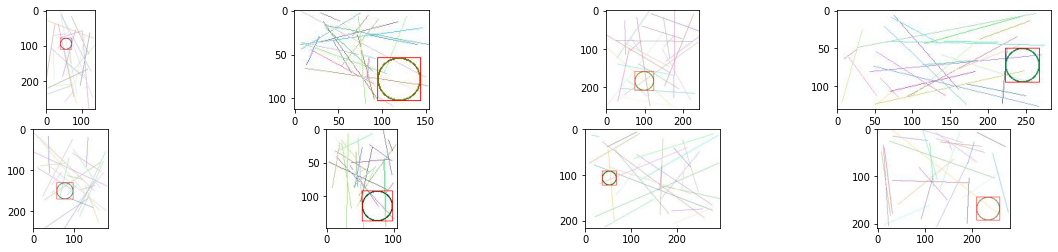

In [4]:
df = pd.read_csv('annotations.csv')
df_sample = df.sample(8).values

plt.figure(figsize=(20, 4))
for k, (path, x0, y0, x1, y1) in enumerate(df_sample):
    plt.subplot(2, 4, k+1)

    img_pil = Image.open(path)
    draw = ImageDraw.Draw(img_pil)
    draw.rectangle([x0, y0, x1, y1], fill=None, outline='red', width=1)

    plt.imshow(img_pil)

plt.show()

# Annotations.csv refatoradas para redimensionar as imagens

In [5]:
def refatorar_anotacoes(df_: pd.DataFrame, new_x, new_y):
    bboxes = []
    for path, x0, y0, x1, y1 in tqdm(df_.values):
        w, h = Image.open(path).size
        x0, y0, x1, y1 = x0*(new_x/w), y0*(new_y/h), x1*(new_x/w), y1*(new_y/h)
        bboxes.append([path, x0, y0, x1, y1])
    
    new_df = pd.DataFrame(bboxes, columns=['path', 'x0', 'y0', 'x1', 'y1'])
    return new_df

df = pd.read_csv('annotations.csv')
df_r = refatorar_anotacoes(df, 100, 100)
df_r.head()

100%|██████████| 20000/20000 [00:01<00:00, 16128.61it/s]


,path,x0,y0,x1,y1
0,./imgs/img_00000.jpg,34.812287,74.874372,49.829352,96.984925
1,./imgs/img_00001.jpg,42.000000,46.779661,68.666667,60.338983
2,./imgs/img_00002.jpg,53.508772,42.748092,91.228070,75.572519
3,./imgs/img_00003.jpg,41.346154,26.070039,72.115385,38.521401
4,./imgs/img_00004.jpg,61.983471,44.117647,94.214876,82.352941


8it [00:00, 74.13it/s]


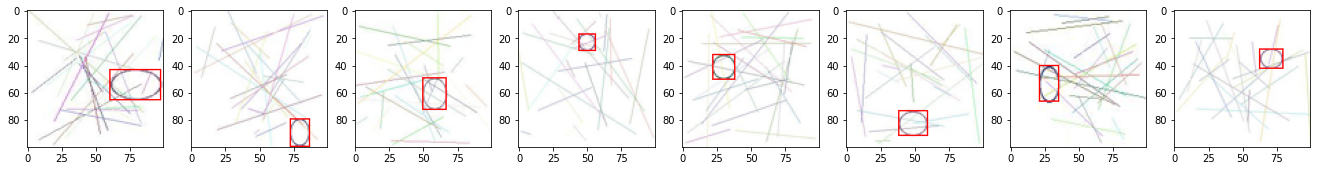

In [6]:
#df = pd.read_csv('annotations.csv')
#df_r = refatorar_anotacoes(df, 150, 150)
df_sample = df_r.sample(8).values

plt.figure(figsize=(23, 4))
for k, (path, x0, y0, x1, y1) in tqdm(enumerate(df_sample)):
    plt.subplot(1, 8, k+1)

    img_pil = Image.open(path).resize((100, 100))
    draw = ImageDraw.Draw(img_pil)
    draw.rectangle([x0, y0, x1, y1], fill=None, outline='red', width=1)

    plt.imshow(img_pil)

plt.show()